In [4]:
# Kaggle submission: Username: mehradghassemi78, Score: 0.76 on 'Mehrad Ghassemi' notebook
import numpy as np # linear algebra
import pandas as pd # data processing


# data visualization
import seaborn as sns
#import missingno as msno Note: this command reads on Kaggle notebook but not here.
#%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


# Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Models
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , roc_auc_score

In [5]:
# Loading the data, this is the path for my directory. in order to load this on your, it has to change
df_test = pd.read_csv("/Users/mehradghassemi/Desktop/MMAI/MMAI_5000/Assignment_2/Titanic_ML/data/raw/test.csv")
df_train = pd.read_csv("/Users/mehradghassemi/Desktop/MMAI/MMAI_5000/Assignment_2/Titanic_ML/data/raw/train.csv")

In [6]:
def concat_df(train_data, test_data):
    return pd.concat ([train_data, test_data], sort=True).reset_index(drop=True)

df_all = pd.concat([df_train, df_test], sort=True).reset_index(drop=True)

submission = pd.DataFrame().assign(PassengerId=df_test['PassengerId'])
print(submission)

     PassengerId
0            892
1            893
2            894
3            895
4            896
..           ...
413         1305
414         1306
415         1307
416         1308
417         1309

[418 rows x 1 columns]


In [7]:
# EDA ######################################################
# Print information of train and test sets
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [8]:
# printing basic description of data 
print(df_train.head(8))
print(df_test.head(8))
print(df_train.tail(5))
print(df_test.tail(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    mal

In [9]:
# generating some random parts of train and test dataset
print(df_train.sample(10))
print(df_test.sample(10))

     PassengerId  Survived  Pclass  \
135          136         0       2   
86            87         0       3   
227          228         0       3   
96            97         0       1   
599          600         1       1   
388          389         0       3   
570          571         1       2   
303          304         1       2   
377          378         0       1   
634          635         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
135                            Richard, Mr. Emile    male  23.0      0      0   
86                         Ford, Mr. William Neal    male  16.0      1      3   
227               Lovell, Mr. John Hall ("Henry")    male  20.5      0      0   
96                      Goldschmidt, Mr. George B    male  71.0      0      0   
599  Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")    male  49.0      1      0   
388                          Sadlier, Mr. Matthew    male   NaN      0      0   
570           

In [10]:
# printing descriptive statistics such as means, median, standard deviation, etc
print(df_train.describe())
print("length of train set is: ", len(df_train))
print("length of test set is: ", len(df_test))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
length of train set is:  891
length of test set is:  418


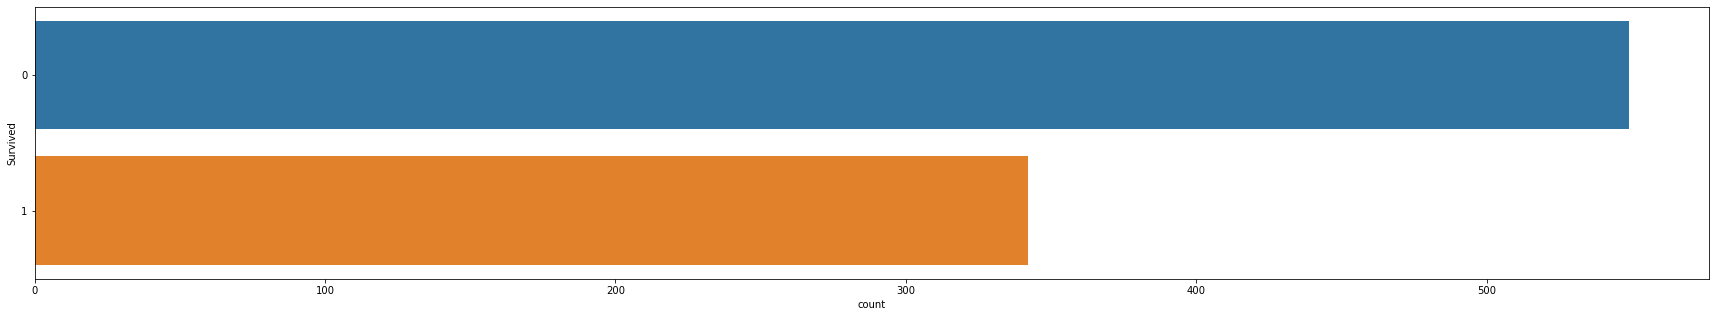

In [11]:
# Plotting the survival rate based on train dataset
fig = plt.figure(figsize=(30, 5))
sns.countplot(y='Survived', data=df_train)
plt.show()

In [12]:
# let's define our columns by deviding them into catgorial and numeric dfs and find correlation between them
df_category = df_train[['Pclass', 'Survived', 'Ticket', 'Cabin', 'Embarked', 'Sex']]
df_numeric = df_train[['Age', 'Parch', 'Fare', 'SibSp']]
print(df_numeric.head(2))
print(df_category.head(2))

    Age  Parch     Fare  SibSp
0  22.0      0   7.2500      1
1  38.0      0  71.2833      1
   Pclass  Survived     Ticket Cabin Embarked     Sex
0       3         0  A/5 21171   NaN        S    male
1       1         1   PC 17599   C85        C  female


In [13]:
# Exploring correlation (categorial) between Pclass and Survival rate
print(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count().sort_values(by='Pclass', ascending = True))

# Exploring correlation (categorial) between Pclass, Sex and Survival rate
print(df_train[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex'], as_index=True).count().sort_values(by='Pclass', ascending = True))

# Exploring correlation (categorial) between Pclass, Sex, Embarked, and Survival rate
print(df_train[['Pclass', 'Sex', 'Embarked', 'Survived']].groupby(['Pclass', 'Sex', 'Embarked'], as_index=True).count().sort_values(by='Pclass', ascending = True))

# Exploring correlation (numerical) between Age, Parch, Fare, SibSp
pd.pivot_table(df_train, index = 'Survived', values = ['Age', 'Parch', 'Fare', 'SibSp'])


        Survived
Pclass          
1            216
2            184
3            491
               Survived
Pclass Sex             
1      female        94
       male         122
2      female        76
       male         108
3      female       144
       male         347
                        Survived
Pclass Sex    Embarked          
1      female C               43
              Q                1
              S               48
       male   C               42
              Q                1
              S               79
2      male   S               97
              Q                1
              C               10
       female S               67
              Q                2
              C                7
3      female C               23
              Q               33
              S               88
       male   C               43
              Q               39
              S              265


,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


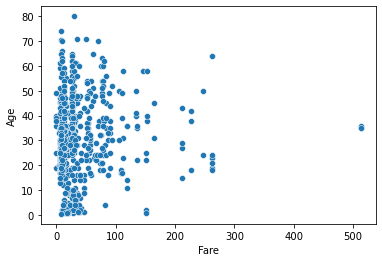

In [14]:
sns.scatterplot(data = df_train, x = "Fare", y = "Age")
plt.show()

In [15]:
# Identification of missing values 
train_missing_all = df_train.isnull().sum().sort_values(ascending=False)
test_missing_all = df_test.isnull().sum().sort_values(ascending=False)
print(train_missing_all) 
print(test_missing_all)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64
Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


In [16]:
# Dealing with null values of age 
df_all.Age = df_all.Age.fillna(df_all.Age.median())
train_missing_all = df_all.isnull().sum().sort_values(ascending=False)
print(train_missing_all)

# dealing with null values of fare
df_all.Fare = df_all.Fare.fillna(df_all.Fare.median())
train_missing_all = df_all.isnull().sum().sort_values(ascending=False)
print(train_missing_all)

# dealing with embarked null values
print(df_all[df_all['Embarked'].isnull()])
print(df_all[['Pclass', 'Sex', 'Embarked','PassengerId']].groupby(['Embarked', 'Pclass', 'Sex'], as_index=True).count().sort_values(by='Embarked', ascending = True))
# Based on the above data, for the rows with Embarked being NaN we found that the Pclasses and Sex is 1 and female respectively. 
# Based on the correlation found above, it's more likely for them to be in Embarked 'S'.
df_all.Embarked = df_all.Embarked.fillna('S')
train_missing_all = df_all.isnull().sum().sort_values(ascending=False)
print(train_missing_all)

Cabin          1014
Survived        418
Embarked          2
Fare              1
Age               0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dtype: int64
Cabin          1014
Survived        418
Embarked          2
Age               0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Ticket            0
dtype: int64
      Age Cabin Embarked  Fare                                       Name  \
61   38.0   B28      NaN  80.0                        Icard, Miss. Amelie   
829  62.0   B28      NaN  80.0  Stone, Mrs. George Nelson (Martha Evelyn)   

     Parch  PassengerId  Pclass     Sex  SibSp  Survived  Ticket  
61       0           62       1  female      0       1.0  113572  
829      0          830       1  female      0       1.0  113572  
                        PassengerId
Embarked Pclass Sex      

11
11
              Survived
Family_count          
4             0.724138
3             0.578431
2             0.552795
7             0.333333
1             0.303538
5             0.200000
6             0.136364
8             0.000000
11            0.000000


/Users/mehradghassemi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/mehradghassemi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


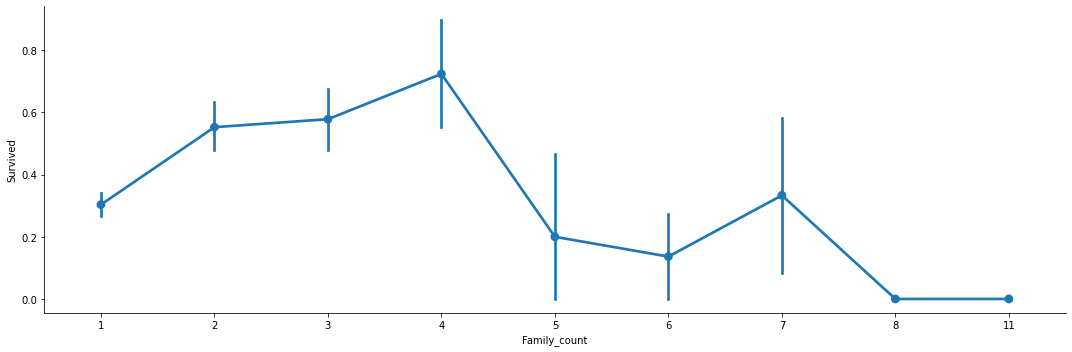

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Deck, Length: 891, dtype: object
      Survived
Deck          
D     0.757576
E     0.750000
B     0.744681
F     0.615385
C     0.593220
G     0.500000
A     0.466667
N     0.299854
T     0.000000
0      N
1      N
2      N
3      N
4      N
      ..
413    N
414    C
415    N
416    N
417    N
Name: Deck, Length: 418, dtype: object
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_count',
       'Family_category', 'Deck'],
      dtype='object')
   PassengerId  Pclass                              Name     Sex  \
0          892       3                  Kelly, Mr. James    male   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2         Myles, Mr. Thomas Francis    male   

                Age  SibSp  Parch  Ticket             Fare Cabin Embarked  \
0  (28

In [17]:
# Feature engineering #############################

# Creating a column that sums up parents, children, sibling and spouses and incrementing by 1 for the person himself/herself
df_train['Family_count'] = df_train["Parch"] + df_train["SibSp"] + 1
print(df_train['Family_count'].max())

df_test['Family_count'] = df_test["Parch"] + df_test["SibSp"] + 1
print(df_test['Family_count'].max())

# Checking the correlation of family_count with survival
print(df_train[['Family_count','Survived']].groupby(['Family_count'], as_index=True).mean().sort_values(by='Survived', ascending = False))


sns.factorplot('Family_count','Survived', data=df_train, aspect = 3)
plt.show()

# We are going to separate the family_count values into 3 categories of alone [1], small [2-4] medium [5-6] and large [7-11]
categories = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}

df_train['Family_category'] = df_train['Family_count'].map(categories)
df_test['Family_category'] = df_test['Family_count'].map(categories)

# Dealing with cabin feature
# We are going to replace null values with letter 'N'
df_train['Deck'] = df_train['Cabin'].apply(lambda i: i[0] if pd.notnull(i) else 'N')
print(df_train['Deck'])

# Printing correlation between Deck and Survived
print(df_train[['Deck','Survived']].groupby(['Deck'], as_index=True).mean().sort_values(by='Survived', ascending = False))

df_test['Deck'] = df_test['Cabin'].apply(lambda i: i[0] if pd.notnull(i) else 'N')
print(df_test['Deck'])

df_train['Fare'] = pd.qcut(df_train['Fare'], 4)
df_test['Fare'] = pd.qcut(df_test['Fare'], 4)

df_train['Age'] = pd.cut(df_train['Age'], 8)
df_test['Age'] = pd.cut(df_test['Age'], 8)

df_train.drop(columns = ['Cabin'])
print(df_train.columns)

df_test.drop(columns = ['Cabin'])
print(df_test.head(3))


In [18]:
# Encoding ########################################

# converting into encoded features 
one_hot = df_train.columns.tolist()
one_hot.remove('Survived')
df_train_onehot = pd.get_dummies(df_train, columns=one_hot)

df_test_onehot = pd.get_dummies(df_test, columns=one_hot)

df_train_onehot.head()
df_test_onehot.head()

df_train_enc = df_train.apply(LabelEncoder().fit_transform)

df_test_enc = df_test.apply(LabelEncoder().fit_transform)

df_train_enc.head()
df_test_enc
df_train_enc
df_train

df_train.head()
df_test.head()

final_df = df_train_enc

final_df.head()

X = final_df.drop('Survived', axis=1)
Y = final_df.Survived

# Checking the first few rows of X
X.head()

# Getting the shape of Y
Y.shape

# Getting the shape of X and df_test_enc
X.shape, df_test_enc.shape

((891, 14), (418, 14))

In [19]:
# Data Splitting ###########################

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25)

X_train.shape, X_test.shape, X_validation.shape, Y_train.shape,Y_test.shape, Y_validation.shape

# Dropping the last row of X_test and Y_test
X_test = X_test.drop(X_test.index[-1])
Y_test = Y_test.drop(Y_test.index[-1])
X_test.shape, Y_test.shape

((178, 14), (178,))

In [20]:
# Fitting our Models #######################


#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

rf_Y_pred = random_forest.predict(X_validation)


acc_random_forest = round(accuracy_score(Y_validation, rf_Y_pred) * 100, 2)
print(acc_random_forest)

rf_Y_test = random_forest.predict(X_test)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

rf_Y_pred = random_forest.predict(df_test_enc)

#X_train
#Y_train
#df_test_lab
len(rf_Y_pred)
submission['Survived'] = pd.DataFrame(rf_Y_pred)
print(submission)


80.34
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         1
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


In [21]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

lg_Y_pred = logreg.predict(X_validation)

acc_log = round(accuracy_score(Y_validation, lg_Y_pred) * 100, 3)
print(acc_log)

lg_Y_test = logreg.predict(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

lg_Y_pred = logreg.predict(df_test_enc)
len(lg_Y_pred)

75.843


/Users/mehradghassemi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mehradghassemi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

418

In [22]:
# KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
knn_Y_pred = knn.predict(X_validation)

acc_knn = round(accuracy_score(Y_validation, knn_Y_pred) * 100, 3)
print(acc_knn)

56.18


In [23]:

# GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
ga_Y_pred = gaussian.predict(X_validation)

acc_gaussian = round(accuracy_score(Y_validation, ga_Y_pred) * 100, 3)
print(acc_gaussian)

ga_Y_test = gaussian.predict(X_test)

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
ga_Y_pred = gaussian.predict(df_test_enc)
len(ga_Y_pred)

74.157


418

In [24]:
# LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

svc_Y_pred = linear_svc.predict(X_validation)

acc_linear_svc = round(accuracy_score(Y_validation, svc_Y_pred) * 100, 3)
print(acc_linear_svc)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
dt_Y_pred = decision_tree.predict(X_validation)
acc_decision_tree = round(accuracy_score(Y_validation, dt_Y_pred) * 100, 3)
print(acc_decision_tree)

X_train.head()

df_test.head()

39.326
77.528


/Users/mehradghassemi/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_count,Family_category,Deck
0,892,3,"Kelly, Mr. James",male,"(28.606, 38.085]",0,0,330911,"(-0.001, 7.896]",NaN,Q,1,Alone,N
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,"(38.085, 47.564]",1,0,363272,"(-0.001, 7.896]",NaN,S,2,Small,N
2,894,2,"Myles, Mr. Thomas Francis",male,"(57.043, 66.521]",0,0,240276,"(7.896, 14.454]",NaN,Q,1,Alone,N
3,895,3,"Wirz, Mr. Albert",male,"(19.128, 28.606]",0,0,315154,"(7.896, 14.454]",NaN,S,1,Alone,N
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,"(19.128, 28.606]",1,1,3101298,"(7.896, 14.454]",NaN,S,3,Small,N


In [25]:
# Accuracy, f1 score, and AUC on chosen models: Random forest, Logistic regression, Gaussian

# calculating f1 score for the three chosen models: Random forest, Logistic regression, and Gaussian
from sklearn.metrics import f1_score
rf_f1 = f1_score(Y_test , rf_Y_test)
lg_f1 = f1_score(Y_test , lg_Y_test)
ga_f1 = f1_score(Y_test , ga_Y_test)

print("F1 score of random forest is: ", rf_f1)
print("F1 score of Logistic regression is: ", lg_f1)
print("F1 score of Gaussian is: ", ga_f1) 


# calculating the AUC of the chosen models
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(Y_test, rf_Y_test)
lg_auc = roc_auc_score(Y_test, lg_Y_test)
ga_auc = roc_auc_score(Y_test, ga_Y_test)

print("AUC of Random forest is :", rf_auc)
print("AUC of Logistic regression is :", lg_auc)
print("AUC of Gaussian is :", ga_auc)


# Printing the accuracy score of the chosen models
print("Accuracy of Random forest is: ", acc_random_forest)
print("Accuracy of Logistic regression is: ", acc_log)
print("Accuracy of Gaussian is: ", acc_gaussian)

F1 score of random forest is:  0.7482993197278911
F1 score of Logistic regression is:  0.7034482758620689
F1 score of Gaussian is:  0.7320261437908497
AUC of Random forest is : 0.7834107327141384
AUC of Logistic regression is : 0.7472910216718266
AUC of Gaussian is : 0.7654798761609908
Accuracy of Random forest is:  80.34
Accuracy of Logistic regression is:  75.843
Accuracy of Gaussian is:  74.157
